Практическое задание
1. Найти данные для классификации. Данные в группе повторяться не
должны! Предобработать данные, если это необходимо.
2. Изобразить гистограмму, которая показывает баланс классов. Сделать
выводы.
3. Разбить выборку на тренировочную и тестовую. Тренировочная для
обучения модели, тестовая для проверки ее качества.
4. Применить алгоритмы классификации: логистическая регрессия, SVM,
KNN. Построить матрицу ошибок по результатам работы моделей
(использовать confusion_matrix из sklearn.metrics).
5. Сравнить результаты классификации, используя accuracy, precision,
recall и f1-меру (можно использовать classification_report из
sklearn.metrics). Также сравнить время работы алгоритмов. Сделать
выводы.
6. Оформить отчет о проделанной работе.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import time

In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
# Замена нулей в некоторых столбцах на NaN (кроме Outcome)
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

In [ ]:
#удалим строки с NaN
df_cleaned = data.dropna()
print(f"Было строк: {len(data)}, стало: {len(df_cleaned)}")

Было строк: 768, стало: 392


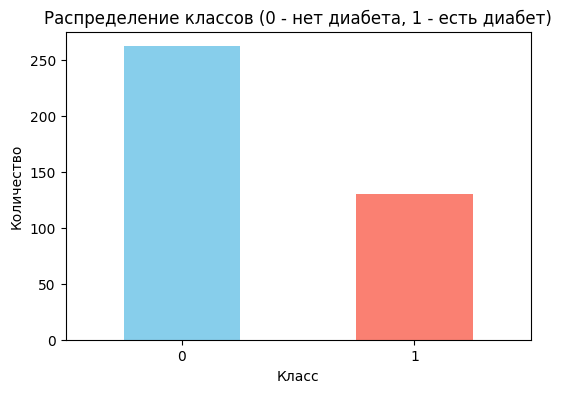

In [ ]:
# Гистограмма баланса классов
plt.figure(figsize=(6, 4))
df_cleaned['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение классов (0 - нет диабета, 1 - есть диабет)')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Разделение на признаки и целевую переменную
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

# Разделение на тренировочную и тестовую выборки (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=271, shuffle=True)
print('размер для признаков обучающей выборки', X_train.shape, '\n',
      'размер для признаков тестовой выборки', X_test.shape, '\n'
      'размер для целевого показателя обучающей выборки', y_train.shape, '\n',
      'размер для показателя тестовой выборки', y_test.shape)


размер для признаков обучающей выборки (78, 8) 
 размер для признаков тестовой выборки (314, 8) 
размер для целевого показателя обучающей выборки (78,) 
 размер для показателя тестовой выборки (314,)


In [ ]:
#Логистическая регрессия
start_time = time.time()
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_time = time.time() - start_time
lr_pred = lr.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_pred)

In [ ]:
#Метод опорных векторов (SVM)
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
svm_time = time.time() - start_time
svm_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_pred)

In [ ]:
#Метод k-ближайших соседей (KNN)
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_time = time.time() - start_time
knn_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_pred)

In [ ]:
#Матрицы ошибок
print("Логистическая регрессия:")
print(lr_cm)
print("\nSVM:")
print(svm_cm)
print("\nKNN:")
print(knn_cm)

Логистическая регрессия:
[[184  23]
 [ 50  57]]

SVM:
[[186  21]
 [ 58  49]]

KNN:
[[180  27]
 [ 60  47]]


In [ ]:
#Метрики качества и время работы
print("\nЛогистическая регрессия:")
print(classification_report(y_test, lr_pred))
print(f"Время обучения: {lr_time:.4f} сек")

print("\nSVM:")
print(classification_report(y_test, svm_pred))
print(f"Время обучения: {svm_time:.4f} сек")

print("\nKNN:")
print(classification_report(y_test, knn_pred))
print(f"Время обучения: {knn_time:.4f} сек")


Логистическая регрессия:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       207
           1       0.71      0.53      0.61       107

    accuracy                           0.77       314
   macro avg       0.75      0.71      0.72       314
weighted avg       0.76      0.77      0.76       314

Время обучения: 0.0268 сек

SVM:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       207
           1       0.70      0.46      0.55       107

    accuracy                           0.75       314
   macro avg       0.73      0.68      0.69       314
weighted avg       0.74      0.75      0.73       314

Время обучения: 0.0037 сек

KNN:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       207
           1       0.64      0.44      0.52       107

    accuracy                           0.72       314
   macro avg       0.69      0.65   

# **Выводы**

. Логистическая регрессия показала наилучшие результаты:

Accuracy: 77% (наибольший показатель)

Precision для класса 1 (диабет): 71% (верно предсказанные случаи диабета)

Recall для класса 1: 53% (выявляет чуть более половины реальных случаев диабета)

F1-score для класса 1: 61% (лучший баланс между precision и recall)

2. SVM показал средние результаты:

Accuracy: 75%

Precision для класса 1: 70% (почти как у логистической регрессии)

Recall для класса 1: 46% (хуже выявляет реальные случаи)

F1-score: 55%

3. KNN показал наихудшие результаты:

Accuracy: 72%

Precision для класса 1: 64%

Recall для класса 1: 44%

F1-score: 52%

Время обучения:
Все модели работают очень быстро (<0.03 сек)

SVM (0.0037 сек) и KNN (0.0036 сек) обучаются быстрее логистической регрессии (0.0268 сек)